##박조은 강사님의 부스트코스의 <strong>파이썬으로 시작하는 데이터 사이언스</strong>를 필사한 내용
- [파이썬으로 시작하는 데이터 사이언스(부스트코스)](https://www.boostcourse.org/ds112)
- [박조은 강사님의 github](https://github.com/corazzon/boostcourse-ds-510)

### 가설을 세우고 분석을 통해 가설을 검정해보기
1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
2. 신장과 허리둘레의 크기가 체중과 상관관계가 있을까?

###라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm

###시각화를 위한 폰트 설정 & 한글 폰트 설정

In [2]:
#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 'ggplot' 스타일을 사용
plt.style.use('ggplot')
# 폰트가 선명하게 보이기 위해
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
#그래프에서 마이너스 폰트 깨지는 문제 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
#시스템에 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print("sys_font number : ",len(sys_font))
nanum_font = [f for f in sys_font if "Nanum" in f]
print("nanum_font number : ",len(nanum_font))
print("시스템에 설치된 폰트 경로 : ",sys_font)

sys_font number :  48
nanum_font number :  31
시스템에 설치된 폰트 경로 :  ['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/true

In [4]:
#나눔고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

fm._rebuild()

In [5]:
nanum_font = [f for f in fm.findSystemFonts() if "Nanum" in f]
print("nanum_font number : ",len(nanum_font))

!python --version
print("현재 설정 폰트",plt.rcParams['font.family'])

nanum_font number :  31
Python 3.7.10
현재 설정 폰트 ['sans-serif']


In [6]:
#한글폰트경로(나눔바른고딕)
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

font_name = fm.FontProperties(fname=fontpath).get_name()
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
# 진행후에 런타임 다시시작

In [7]:
print("현재 설정 폰트",plt.rcParams['font.family'])

현재 설정 폰트 ['NanumBarunGothic']


###데이터 보기


건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.


특성(34)
- 기준년도
- 가입자일련번호
- 성별코드
- 연령대코드(5세단위)
- 시도코드
- 신장(5Cm단위)
- 체중(5Kg단위)
- 허리둘레
- 시력(좌)
- 시력(우)
- 청력(좌)
- 청력(우)
- 수축기혈압
- 이완기혈압
- 식전혈당(공복혈당)
- 총콜레스테롤
- 트리글리세라이드
- HDL콜레스테롤
- LDL콜레스테롤
- 혈색소
- 요단백
- 혈청크레아티닌
- (혈청지오티)AST
- (혈청지오티)ALT
- 감마지티피
- 흡연상태
- 음주여부
- 구강검진수검여부
- 치아우식증유무
- 결손치유무
- 치아마모증유무
- 제3대구치(사랑니)이상
- 치석
- 데이터공개일자

In [8]:
#데이터 로드하기
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/건강검진정보_2017.csv', encoding='cp949')

#### 데이터 미리보기

In [9]:
#sample, head, tail을 통해 데이터를 미리보기 합니다.
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [10]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,1,10,48,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,88.0,198.0,132.0,46.0,125.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999996,2017,999997,1,8,41,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,83.0,133.0,45.0,40.0,84.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,90.0,205.0,157.0,96.0,77.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,69.0,122.0,53.0,38.0,73.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,1.0,1.0,133.0,79.0,99.0,225.0,163.0,39.0,153.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [11]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
419565,2017,419566,1,11,46,165,70,88.0,0.9,0.6,1.0,1.0,136.0,88.0,115.0,187.0,400.0,34.0,101.0,15.0,1.0,1.1,51.0,82.0,69.0,2.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [13]:
#컬럼의 수를 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [14]:
#데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

#### 결측치 보기

In [15]:
#isnull을 통해 결측치를 bool값으로 표시하고 sum을 하면 컬럼마다 결측치를 세어줌
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [16]:
#isna 로도 결측치 여부를 확인할 수 있다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

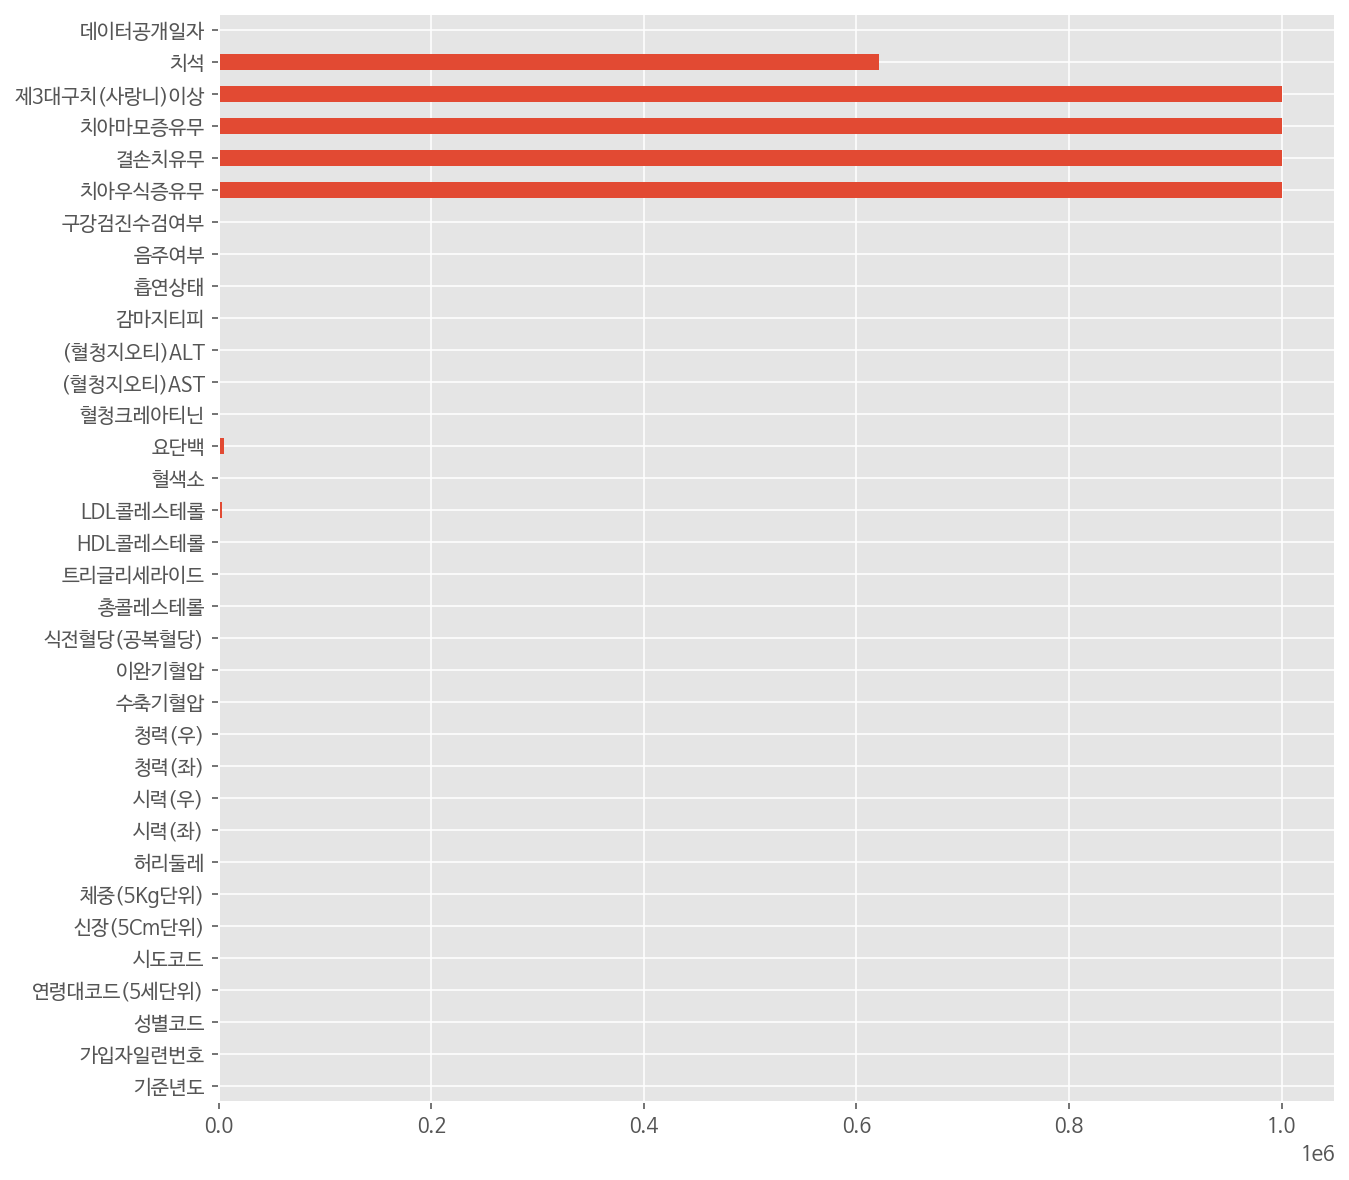

In [17]:
#결측치를 시각화
df.isnull().sum().plot.barh(figsize=(10,10))

####일부 데이터 요약하기

In [18]:
#여러 컬럼을 가져오기
#'(혈청지오티)ALT','(혈청지오티)AST' 를 가져와 미리보기 하기
df[['(혈청지오티)ALT','(혈청지오티)AST']].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [19]:
#'(혈청지오티)ALT','(혈청지오티)AST' 를 요약하기
df[['(혈청지오티)ALT','(혈청지오티)AST']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [20]:
df[['(혈청지오티)ALT','(혈청지오티)AST']].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


####value_counts로 값 집계하기

In [21]:
#value_counts를 통해 성별코드로 그룹화하고 갯수를 집계하기
df['성별코드'].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [22]:
#value_counts를 통해 흡연상태로 그룹화하고 갯수를 집계하기
df['흡연상태'].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

####groupby와 pivot_table 사용하기

groupby

In [23]:
#groupby를 통해 데이터를 그룹화 하기
#성별코드로 그룹화 한 데이터를 세어보기
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [24]:
#성별코드와 음주여부로 그룹화 하고 갯수를 세기
df.groupby(['성별코드','음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [25]:
#성별코드와 음주여부로 그룹화하고 감마지티피의 평균을 구합니다.
df.groupby(['성별코드','음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [26]:
#성별코드와 음주여부로 그룹화하고 감마지티피의 요약수치를 구합니다.
df.groupby(['성별코드','음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [27]:
#agg를 사용하면 여러 수치를 함께 구할 수 있음
df.groupby(['성별코드','음주여부'])['감마지티피'].agg(['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

pivot_table

In [28]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구하기
# groupby는 시리즈데이터, pivot_table은 데이터프레임으로 출력
df.pivot_table(index='음주여부',values='가입자일련번호',aggfunc='count')

,가입자일련번호
음주여부,
N,500439
Y,499025


In [29]:
#음주여부에 따른 감마지티피의 평균을 구합니다.
df.pivot_table(index='음주여부',values='감마지티피',aggfunc='mean')
#같은 값을 다른방식으로
pd.pivot_table(data = df, index = '음주여부', values='감마지티피', aggfunc='mean')

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [30]:
#aggfunc의 기본값은 평균이지만 변경할 수 있다.
#aggfunc에 여러값을 지정할 수 있음
df.pivot_table(index='음주여부',values='감마지티피',aggfunc=['mean','median'])

,mean,median
,감마지티피,감마지티피
음주여부,,
N,26.819650,19.0
Y,47.588675,30.0


In [31]:
#aggfunc에 describe를 사용해 통계요약값을 볼 수 있음
df.pivot_table(index='음주여부',values='감마지티피',aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
N,14.0,19.0,29.0,500417.0,999.0,26.819650,1.0,30.639714
Y,18.0,30.0,52.0,499005.0,999.0,47.588675,1.0,63.056912


In [32]:
#성별코드, 음주여부에 따른 감마지티피의 값을 구할 수 있음
df.pivot_table(index=['성별코드','음주여부'], values='감마지티피')

감마지티피
성별코드 음주여부           
1    N     34.739868
     Y     56.610981
2    N     22.612408
     Y     25.001018

###전체 데이터 시각화 하기 
- 100만개가 넘는 데이터를 시각화할 때는 되도록 groupby 혹은 pivot_table로 연산을하고 시각화하는 것을 권장
- 100만개가 넘는 데이터를 saeborn과 고급 통계 연산을 사용하면 느릴 수 있음

#### 히스토그램
- 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어진 것을 확인할 수 있음
- 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화해서 도수분포표를 만들고 그 결과를 시각화 함
- 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용하여 히스토그램을 그림

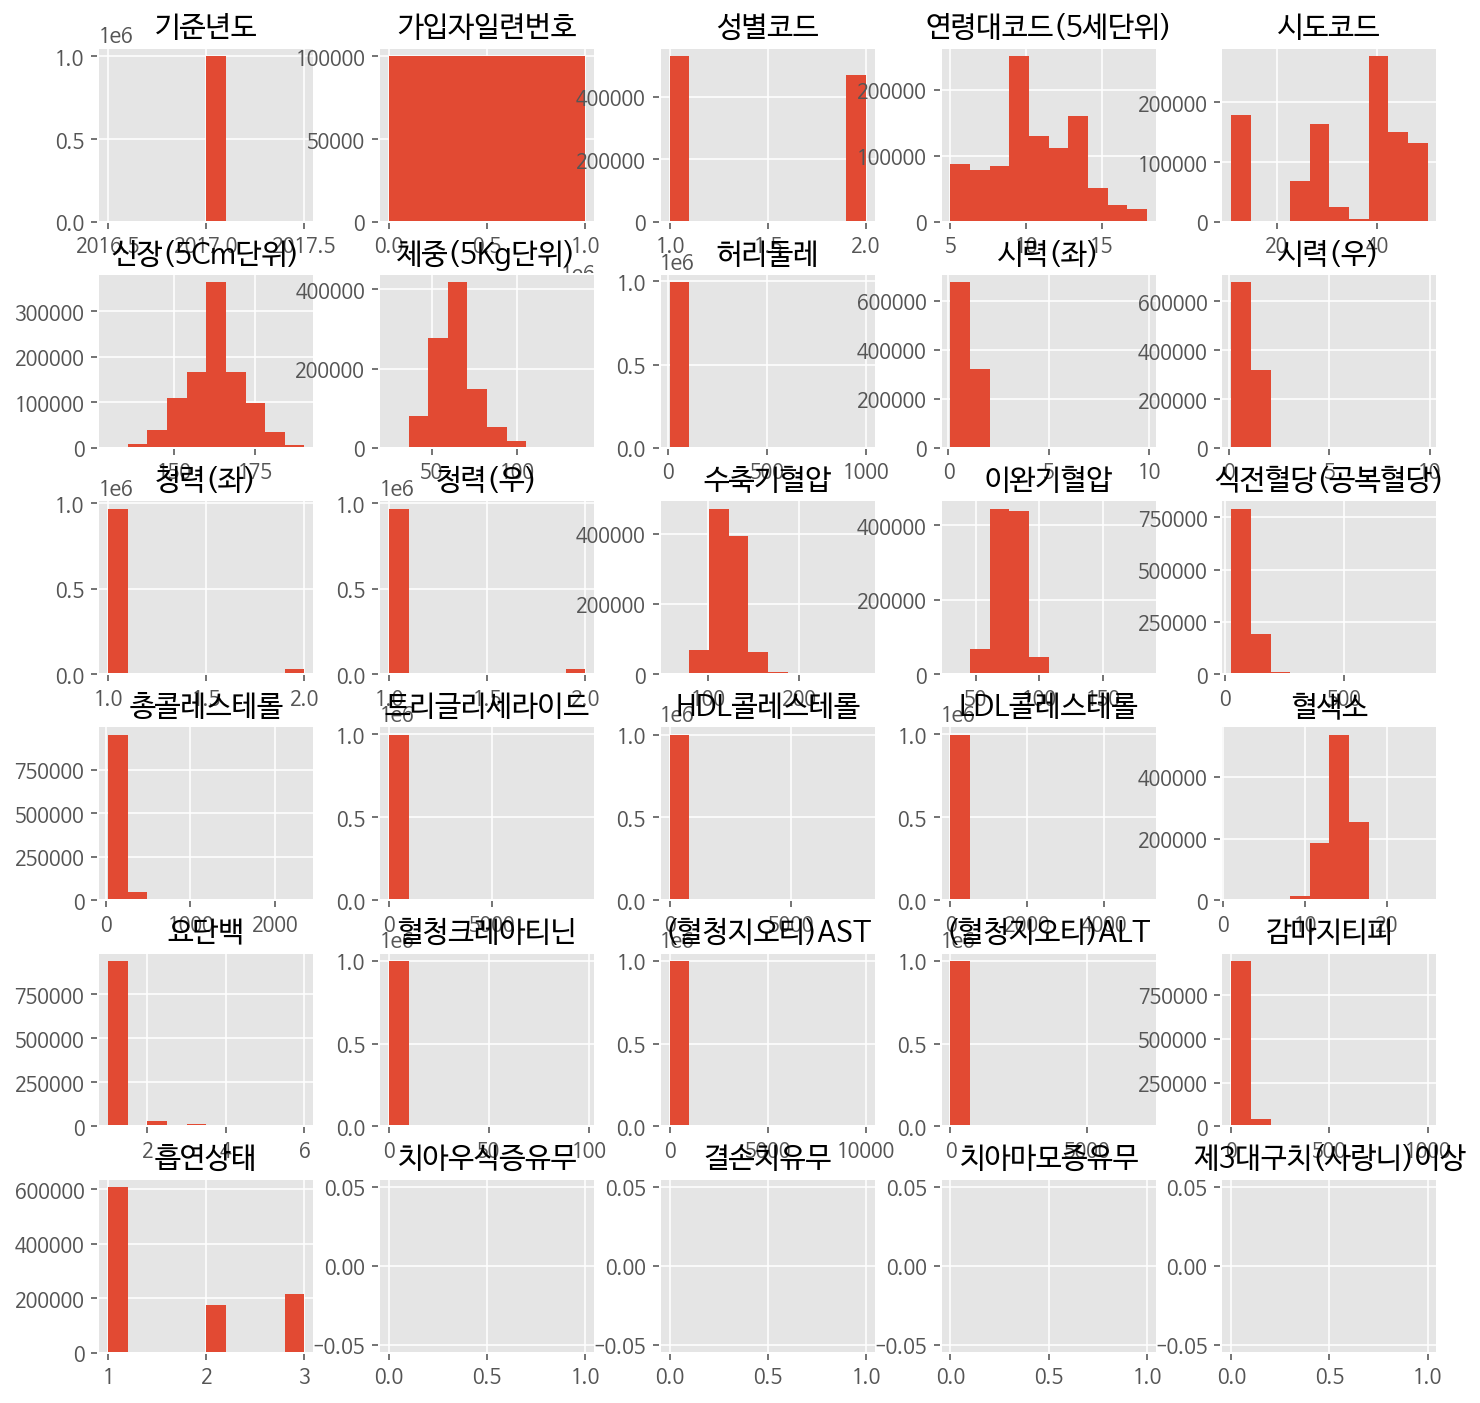

In [33]:
# 전체 데이터에 대한 히스토그램을 출력
# 변수에 넣어 지정하면 좀 더 빠르게 출력가능
h = df.hist(figsize=(12,12))

#### 슬라이싱을 사용해 히스토그램 그리기
- 슬라이싱 기능을 사용해서 데이터를 나누어 그림
- 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능
- iloc[행, 열]순으로 인덱스를 써주면 해당 인덱스만 불러옴
- 슬라이싱을 해주는 대괄호아늬 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스 +1를 지정할 수 있음

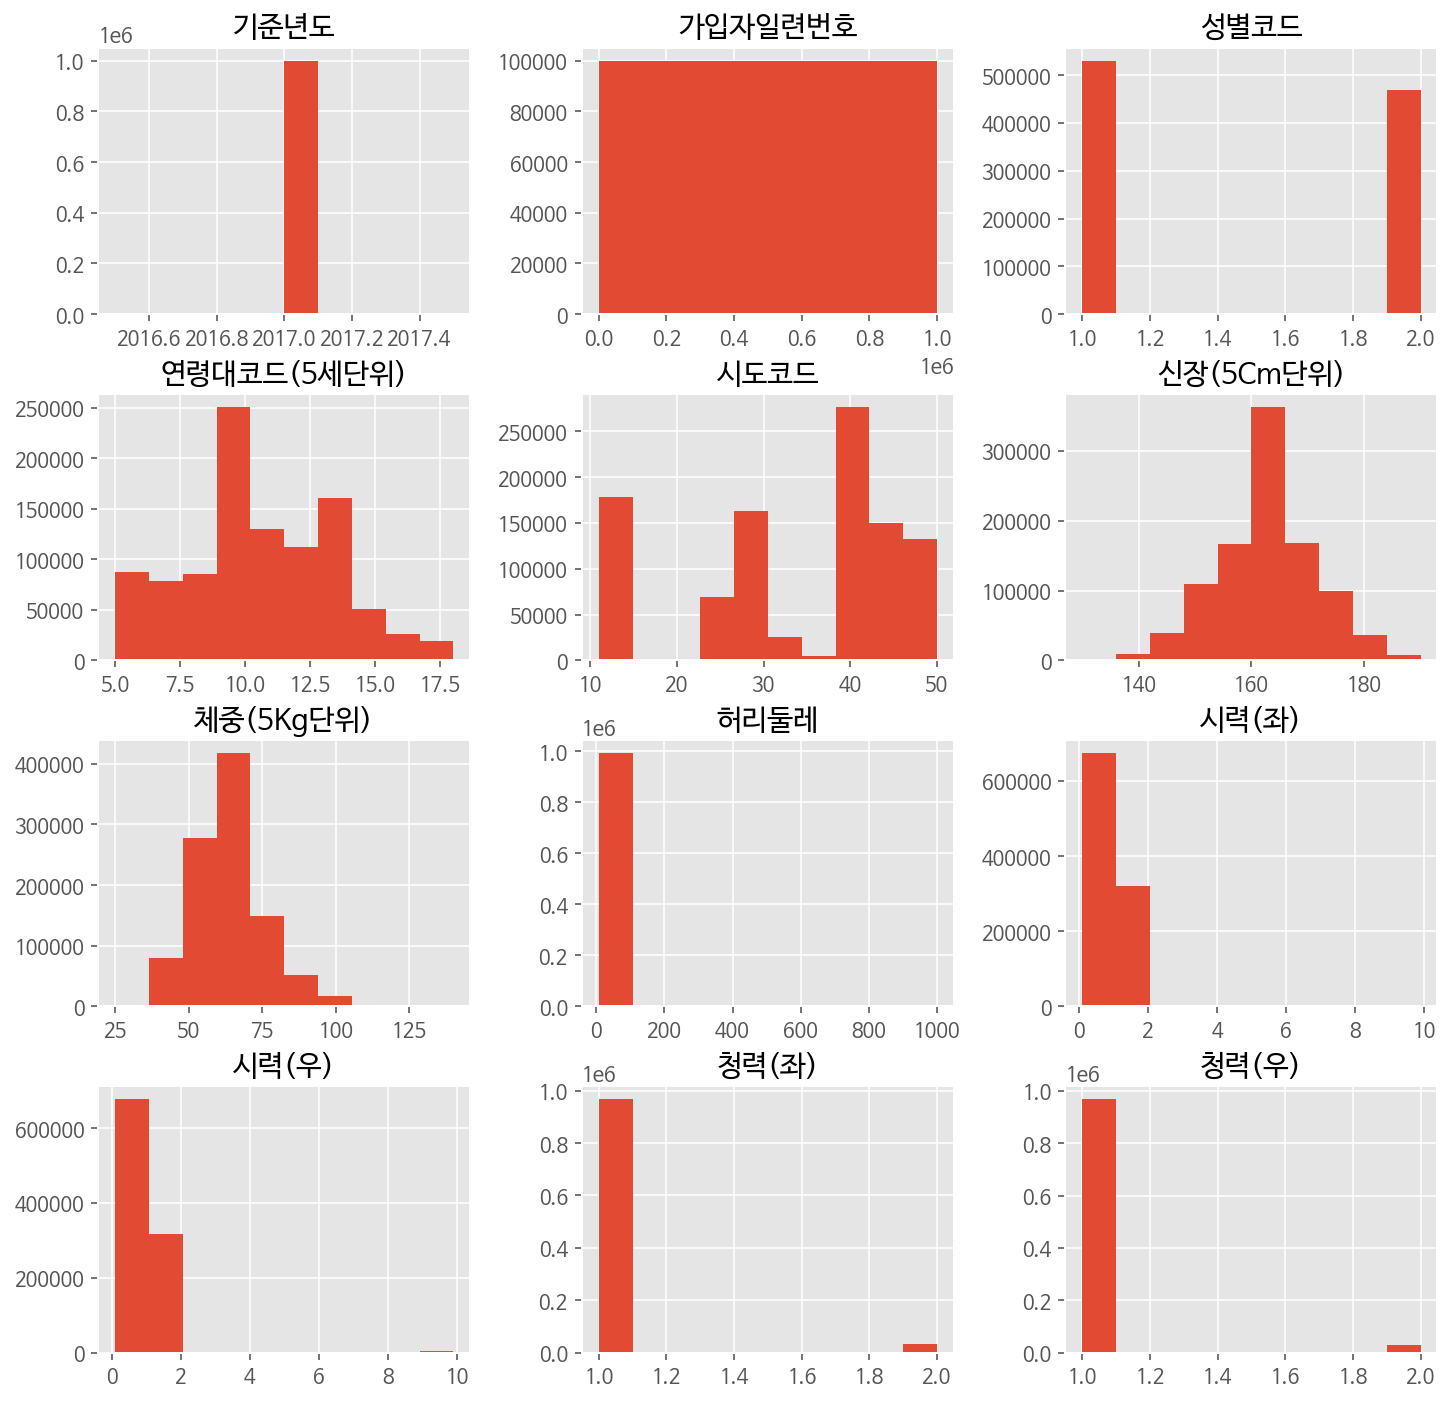

In [34]:
#슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그림
#[행, 열]
h = df.iloc[:,:12].hist(figsize=(12,12))

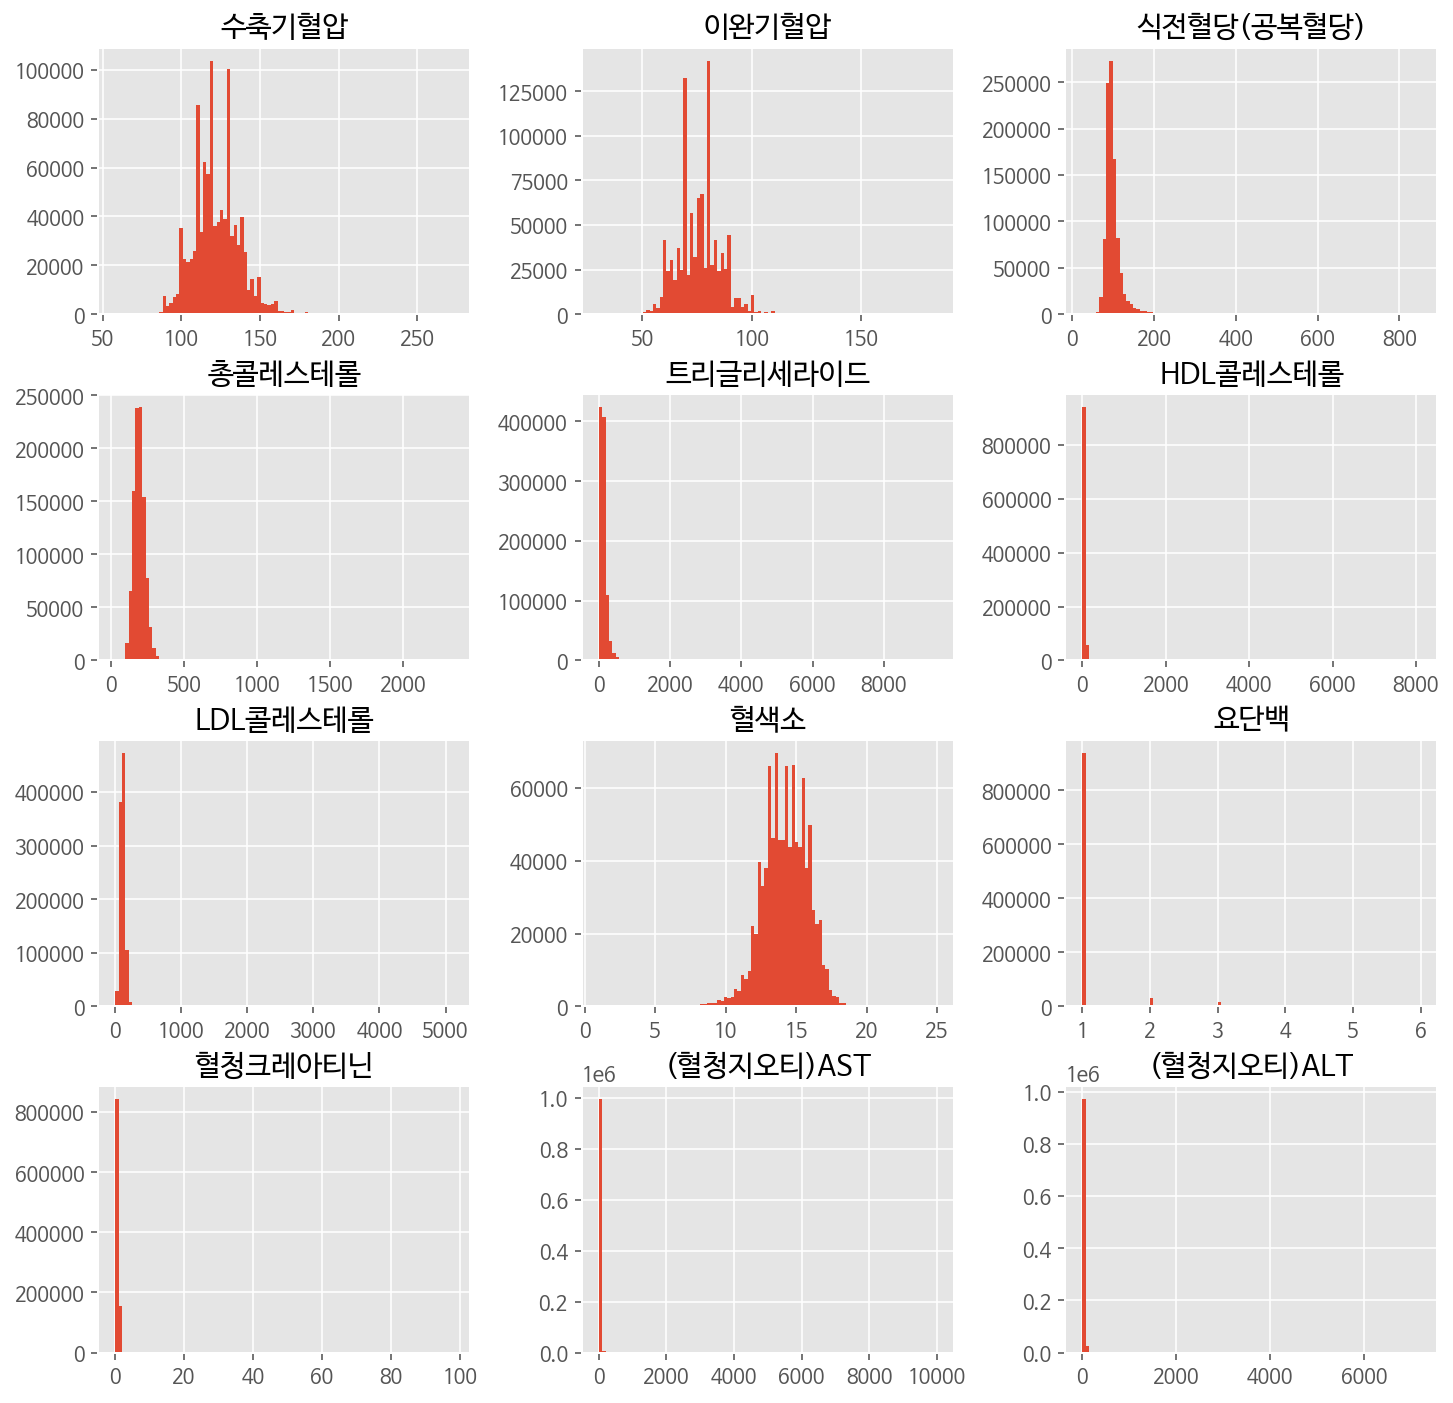

In [35]:
#슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그림
#bins 옵션을 사용해 더 자세하게 표현 가능
h = df.iloc[:,12:24].hist(figsize=(12,12), bins=100)

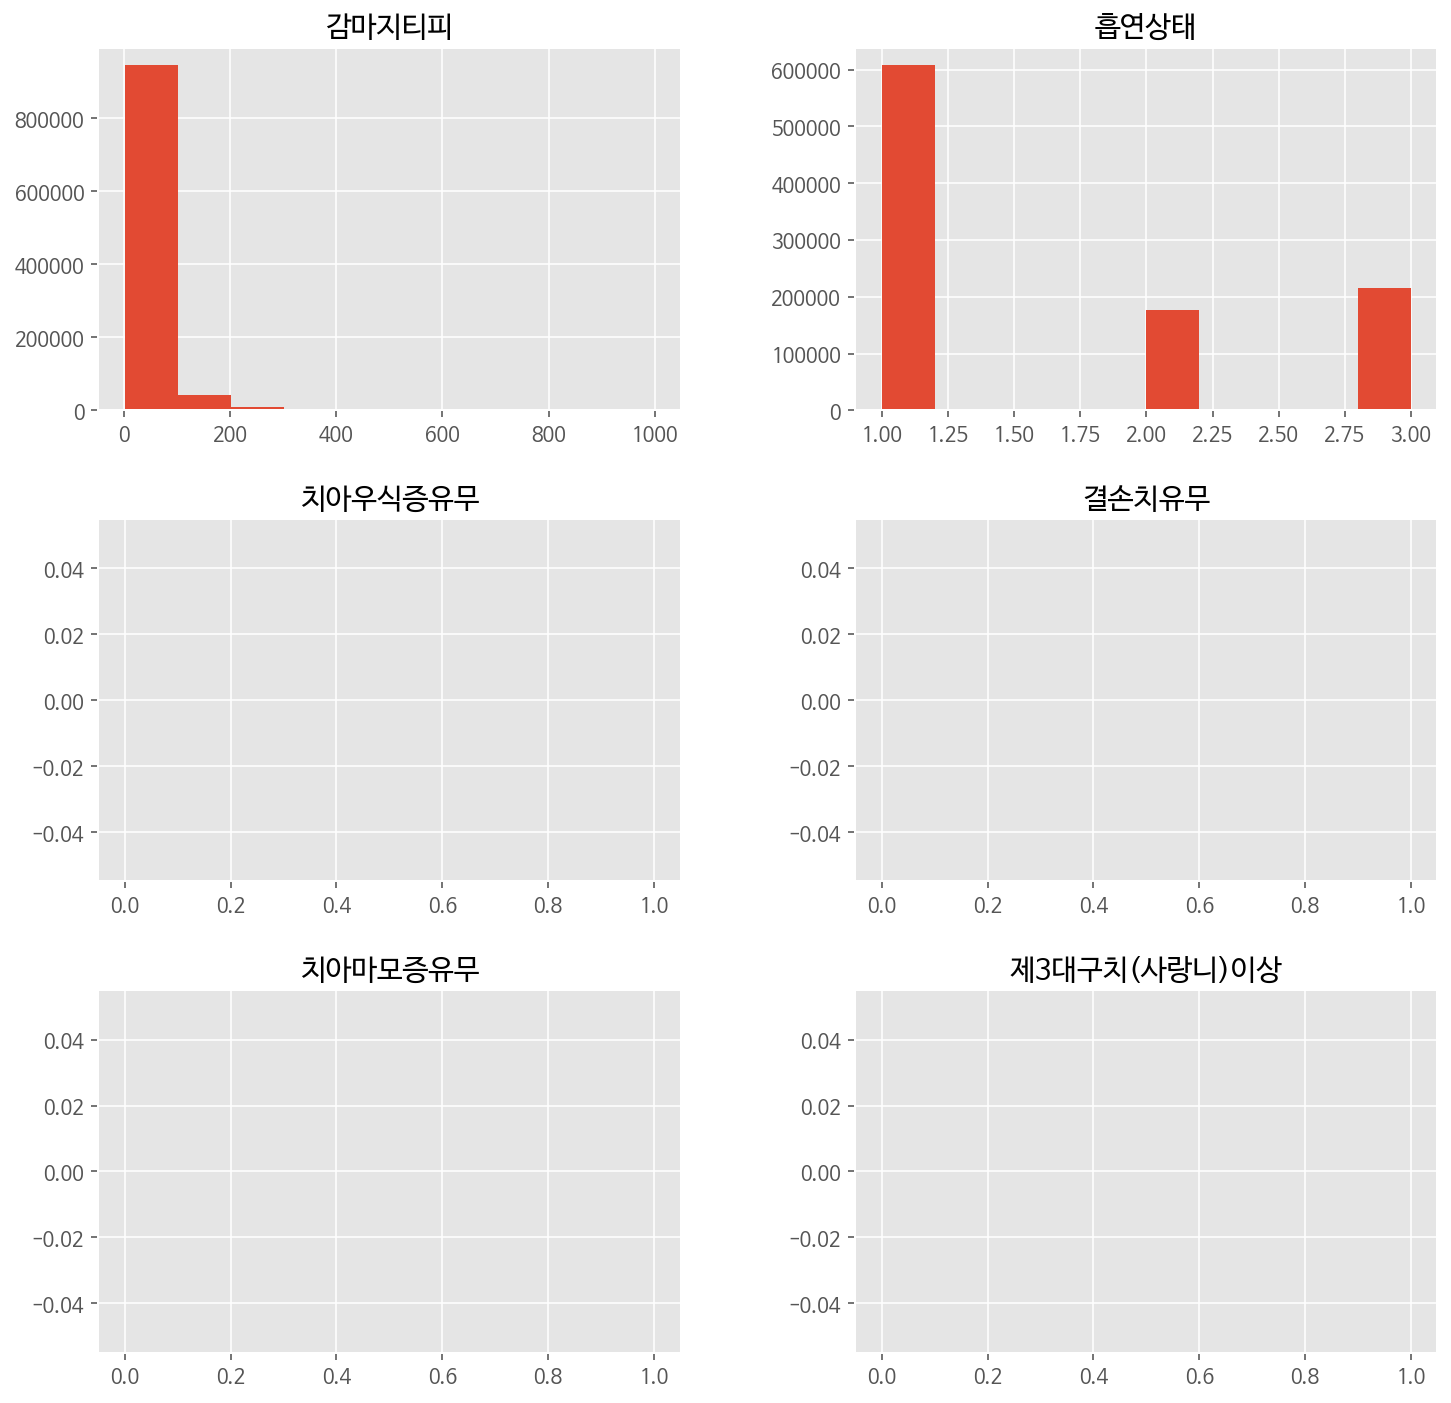

In [36]:
#슬라이싱을 사용해 앞에서 24번째 부터 마지막까지(24:) 컬럼에 대한 데이터로 히스토그램을 그림
h = df.iloc[: , 24:].hist(figsize=(12,12))

###샘플데이터 추출하기
- seaborn의 그래프는 내부에서 수학적연산이 되기때문에 데이터가 많으면 속도가 오래걸림
- 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부 샘플링해서 사용

In [39]:
#df.sample()을 통해 일부 데이터만 샘플링함
#random_state를 사용하여 샘플링 되는 값을 고정
#실험을 통제하기 위해서 random_state를 고정하기도 함
#이번 예제에서는 1을 사용
df_sample = df.sample(1000, random_state=1)

In [40]:
df_sample.shape

(1000, 34)

###범주형(카테고리형) 데이터 시각화
- countplot은 범주형데이터의 수를 더한 값을 그래프로 표현
- value_counts로 구한 값을 시각화 함

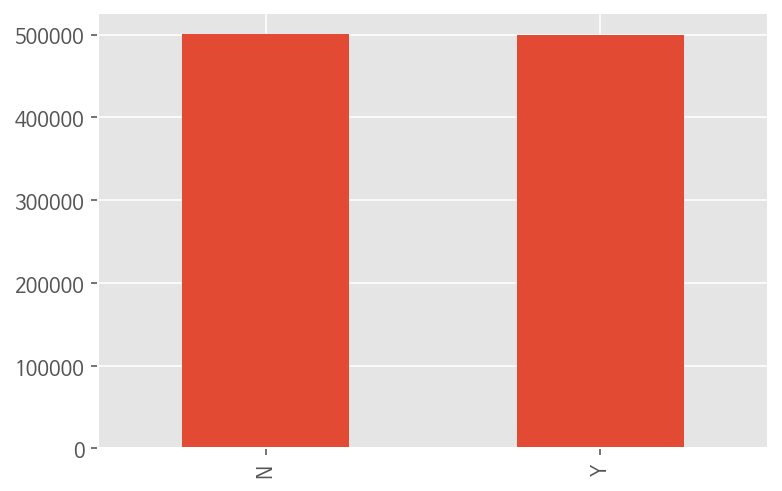

In [43]:

df['음주여부'].value_counts().plot.bar()

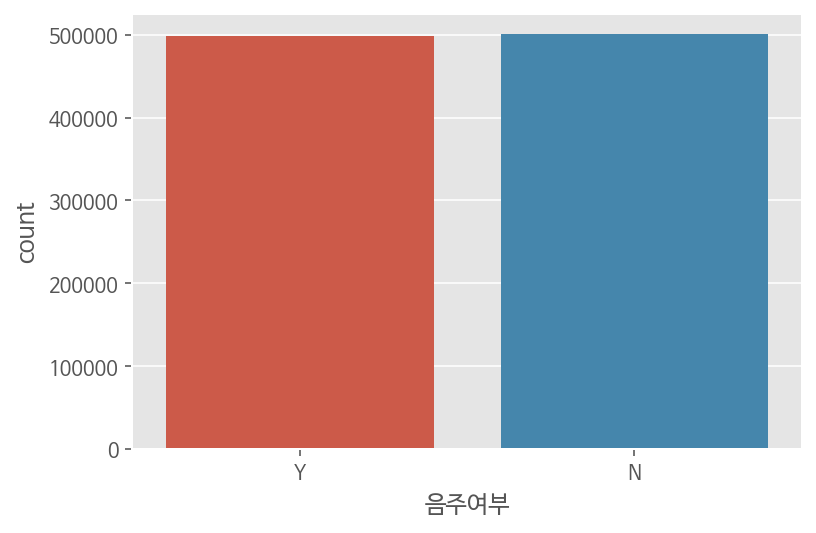

In [46]:
#음주여부에 따른 countplot을 그림
sns.countplot(x='음주여부',data=df)

hue 옵션 사용하기

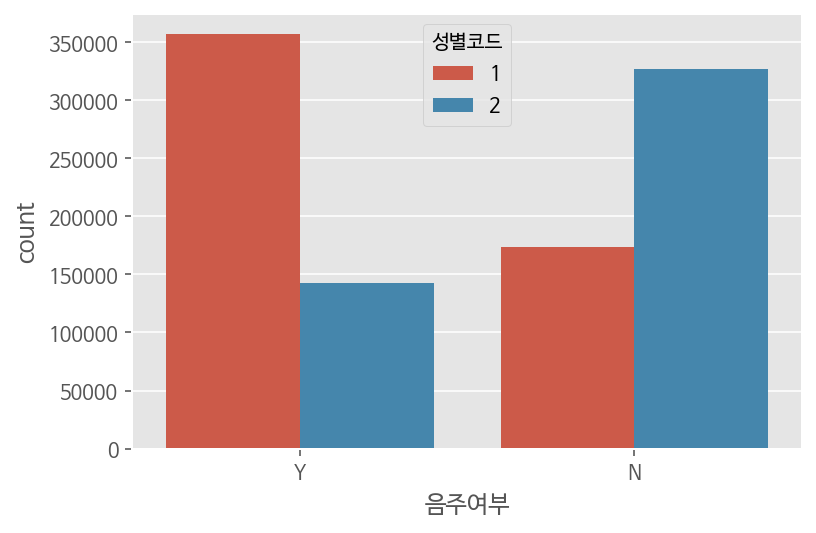

In [47]:
#음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분
sns.countplot(x='음주여부',data=df,hue='성별코드')

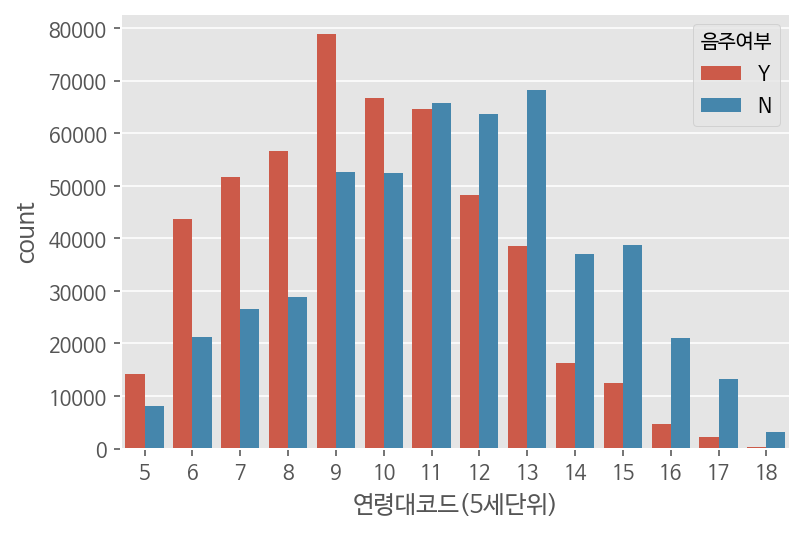

In [52]:
#countplot으로 연령대별 음주여부
sns.countplot(x='연령대코드(5세단위)',data=df, hue='음주여부')

####countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터라고 볼 수 있음
- 하지만 이 데이터의 키는 5cm, 체중은 5kg 단위로 되어있음
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있음


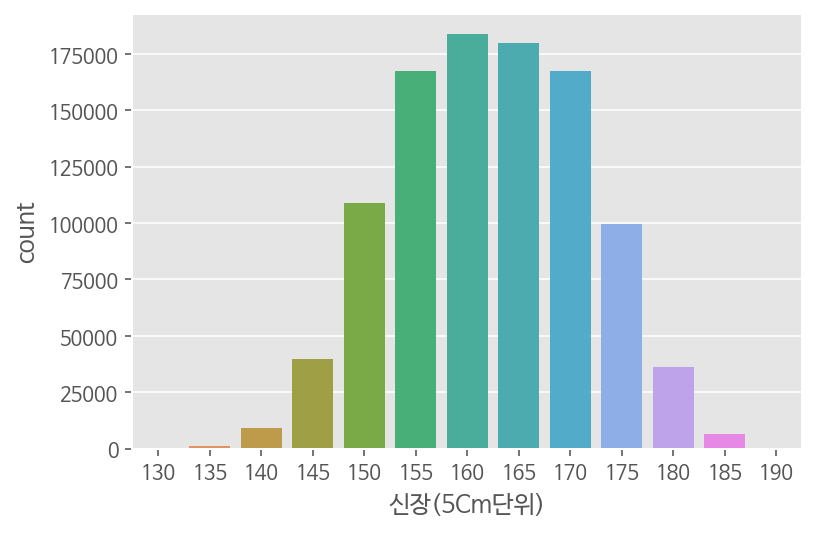

In [56]:
#countplot으로 키를 보기
sns.countplot(x='신장(5Cm단위)', data=df)

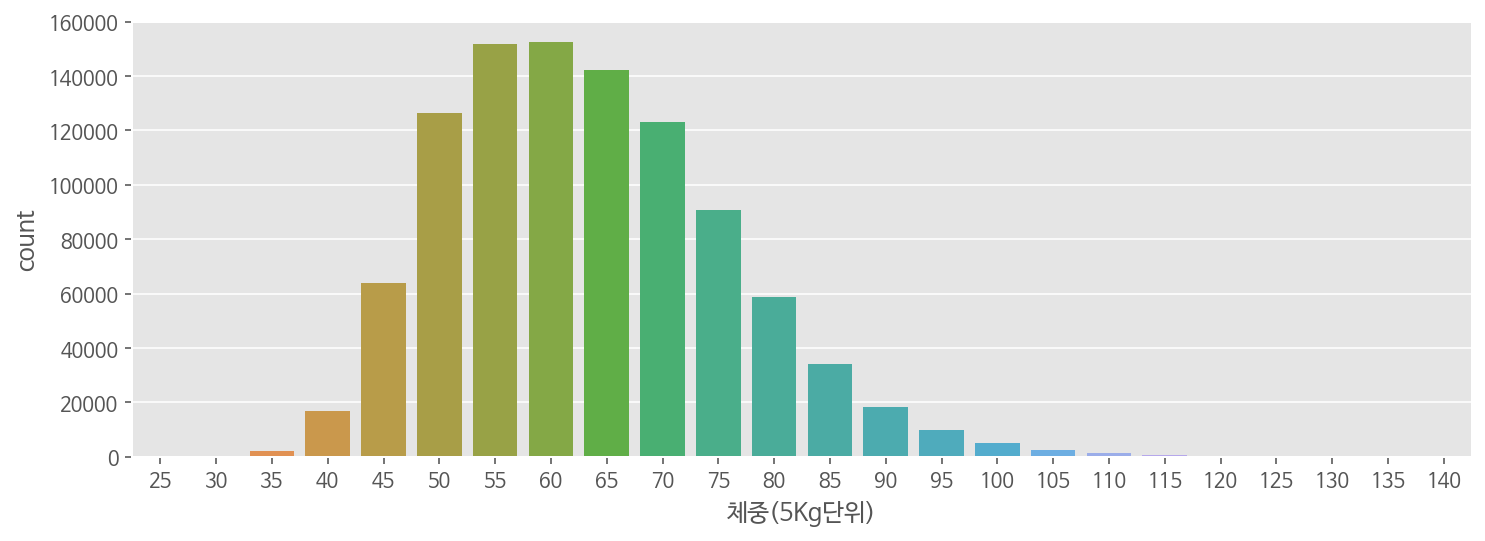

In [59]:
#countplot으로 체중 보기
plt.figure(figsize=(12,4))
sns.countplot(x='체중(5Kg단위)', data=df)

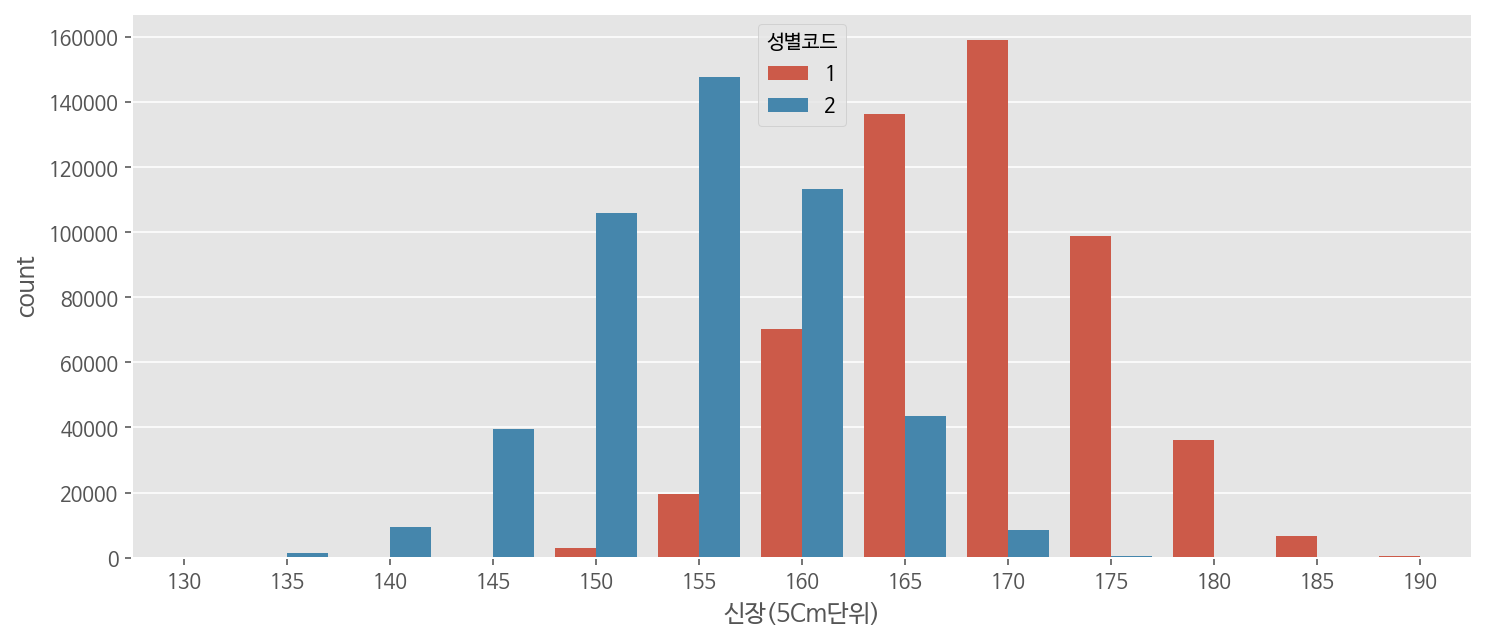

In [75]:
#countplot으로 신장(5Cm단위)'(키)를 보기
#성별에 따른 키의 차이를 보기
plt.figure(figsize=(12,5))
sns.countplot(x='신장(5Cm단위)', data=df, hue='성별코드')

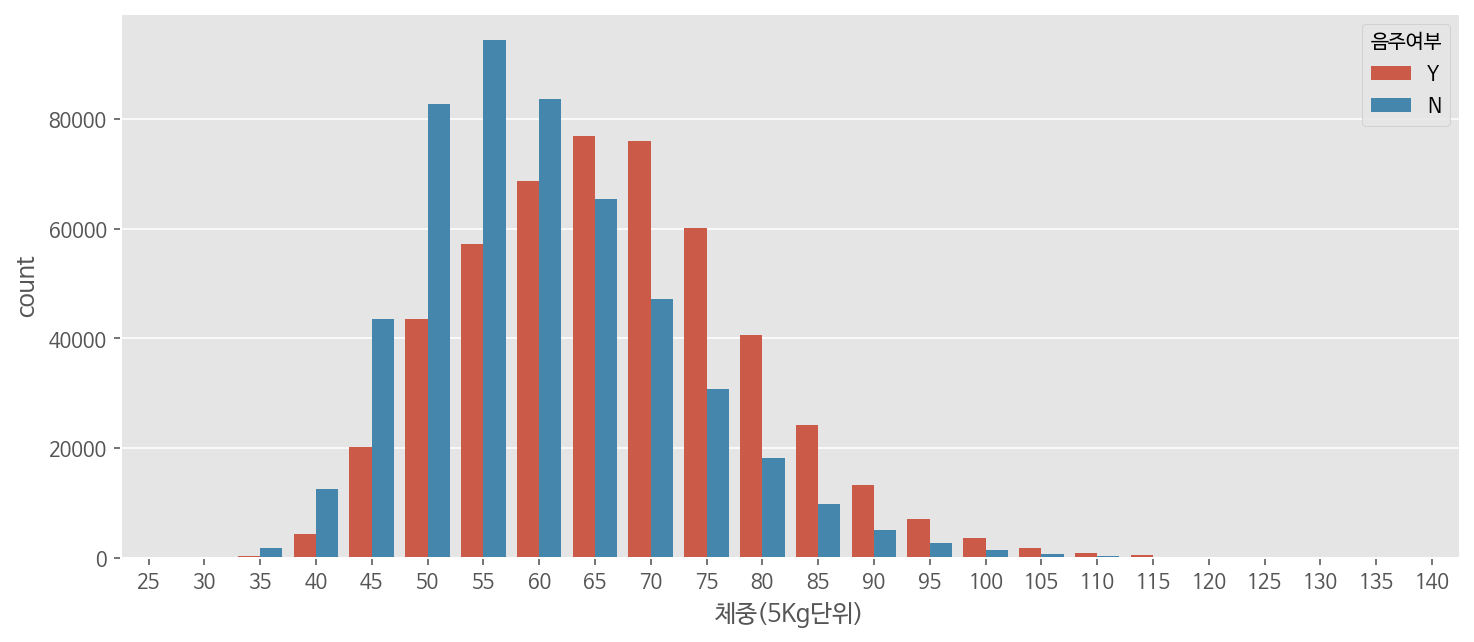

In [77]:
#성별에 따른 체중의 차이
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='체중(5Kg단위)',hue='음주여부')

####barplot - 수치형 vs 범주형 데이터 시각화

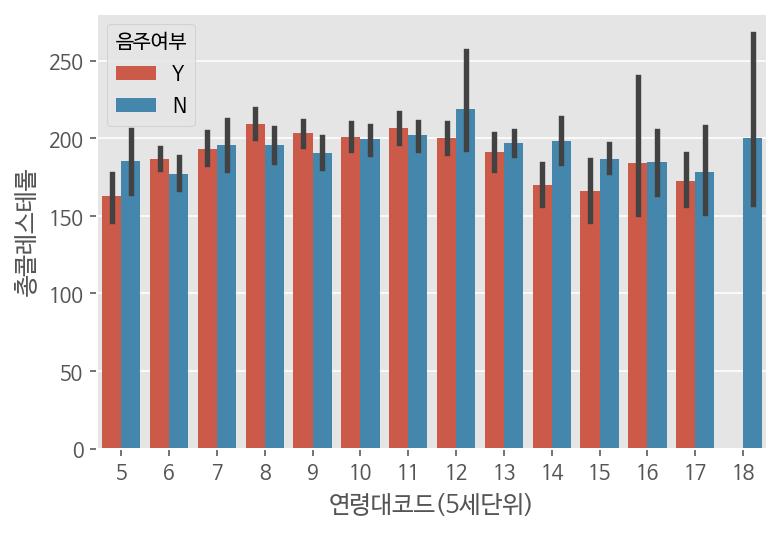

In [82]:
#연령대코드와 총 콜레스테롤을 확인
#hue는 음주여부
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부')

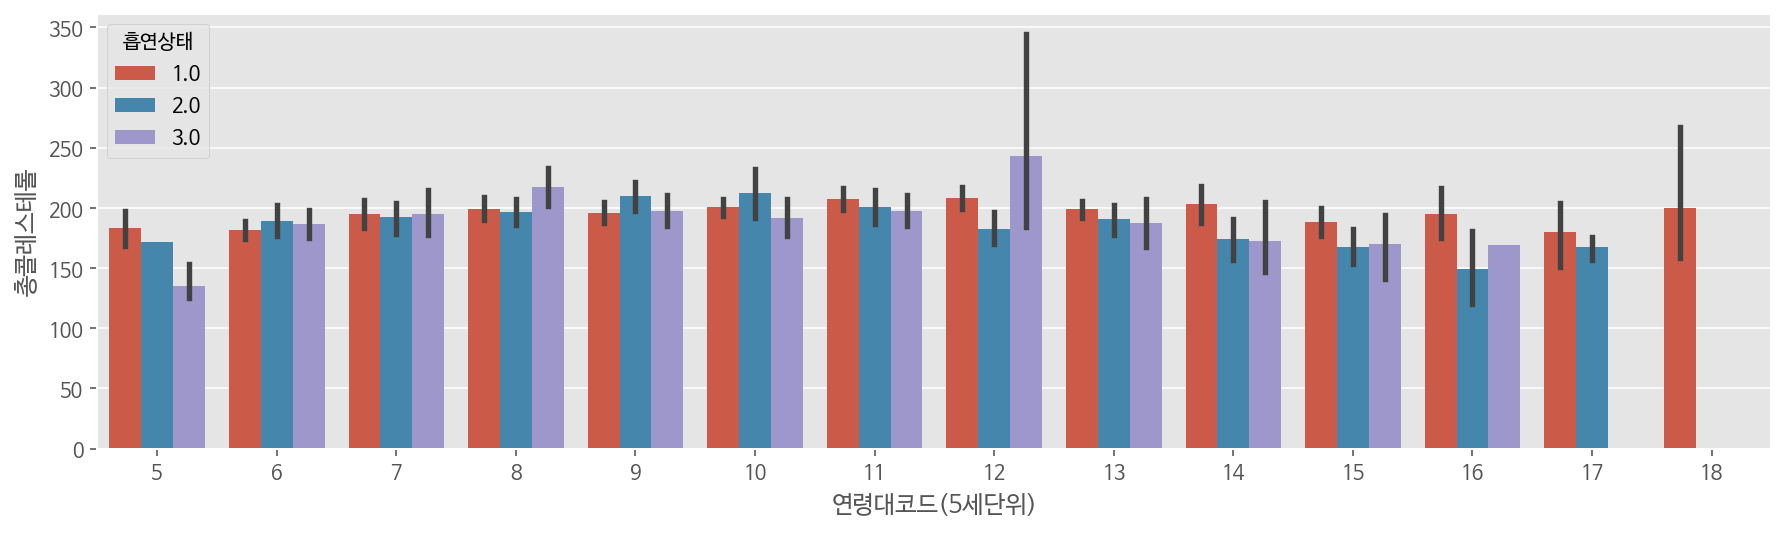

In [83]:
#연령코드와 총콜레스테롤 확인
#hue = 흡연 상태
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', hue='흡연상태')

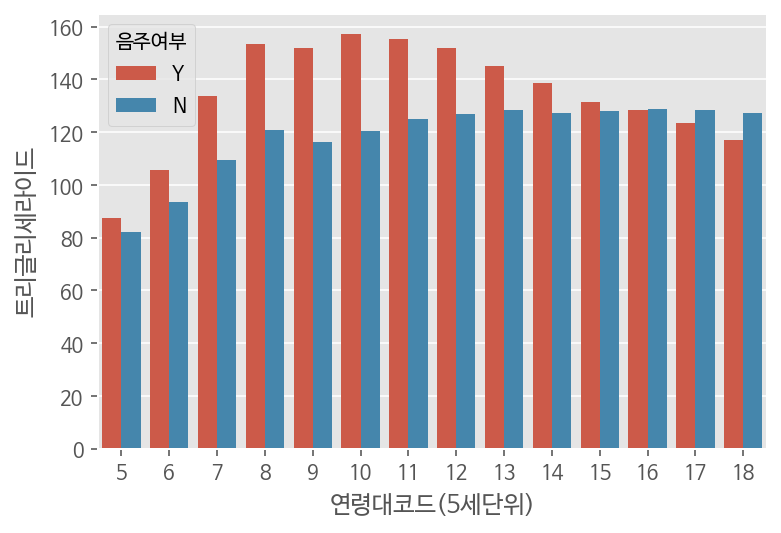

In [99]:
#트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 확인
sns.barplot(data=df, x='연령대코드(5세단위)',y='트리글리세라이드',hue='음주여부',ci=None)

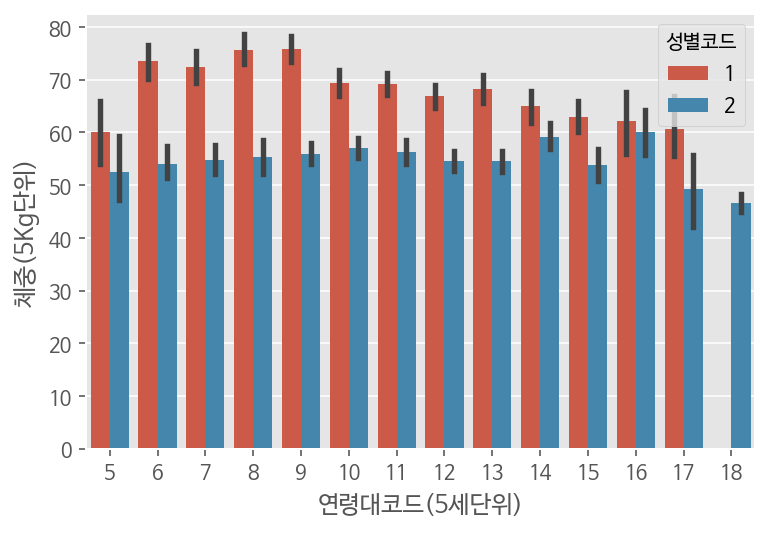

In [94]:
#연령대코드(5세단위)와 체중(5Kg단위)을 성별에따라 확인
sns.barplot(x='연령대코드(5세단위)', y='체중(5Kg단위)', data=df_sample, hue='성별코드')

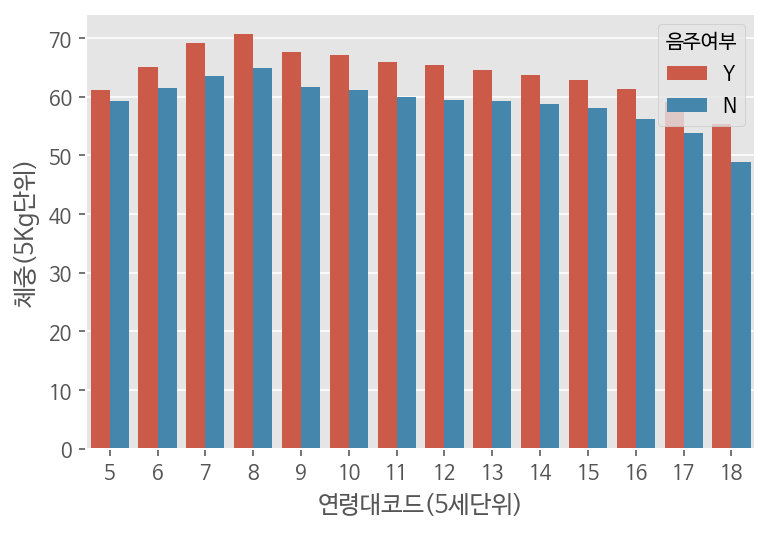

In [98]:
#연령대코드(5세단위)에 따른 체중(5Kg단위)을 음주여부에 따라 확인
sns.barplot(x='연령대코드(5세단위)', y='체중(5Kg단위)',data=df, hue='음주여부',ci=None)

####lineplot & pointplot

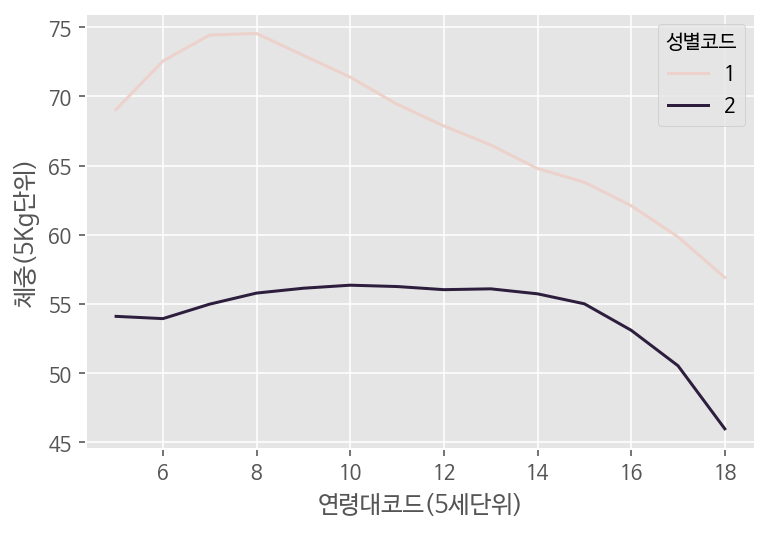

In [105]:
#연령대코드(5세단위)에 따른 체중(5kg단위)을 성별코드에 따라 lineplot으로 확인
sns.lineplot(data=df, x='연령대코드(5세단위)',y='체중(5Kg단위)',hue='성별코드',ci=None)

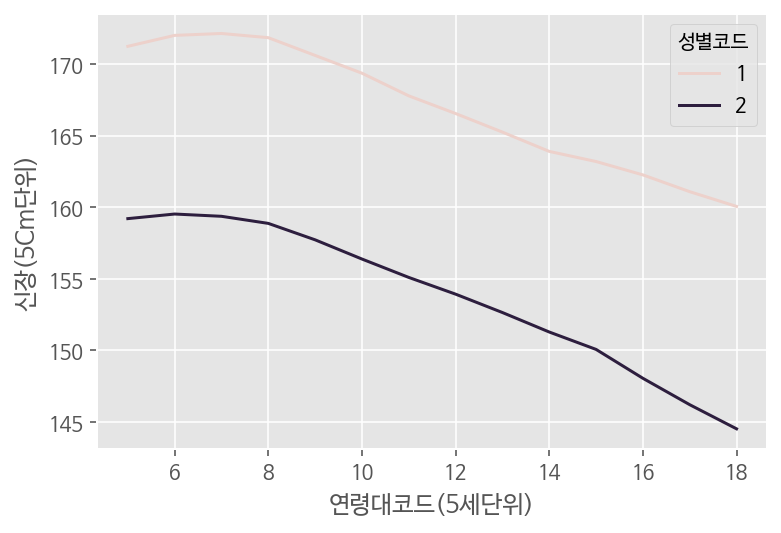

In [106]:
#연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 lineplot으로 확인
sns.lineplot(data=df, x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='성별코드',ci=None)

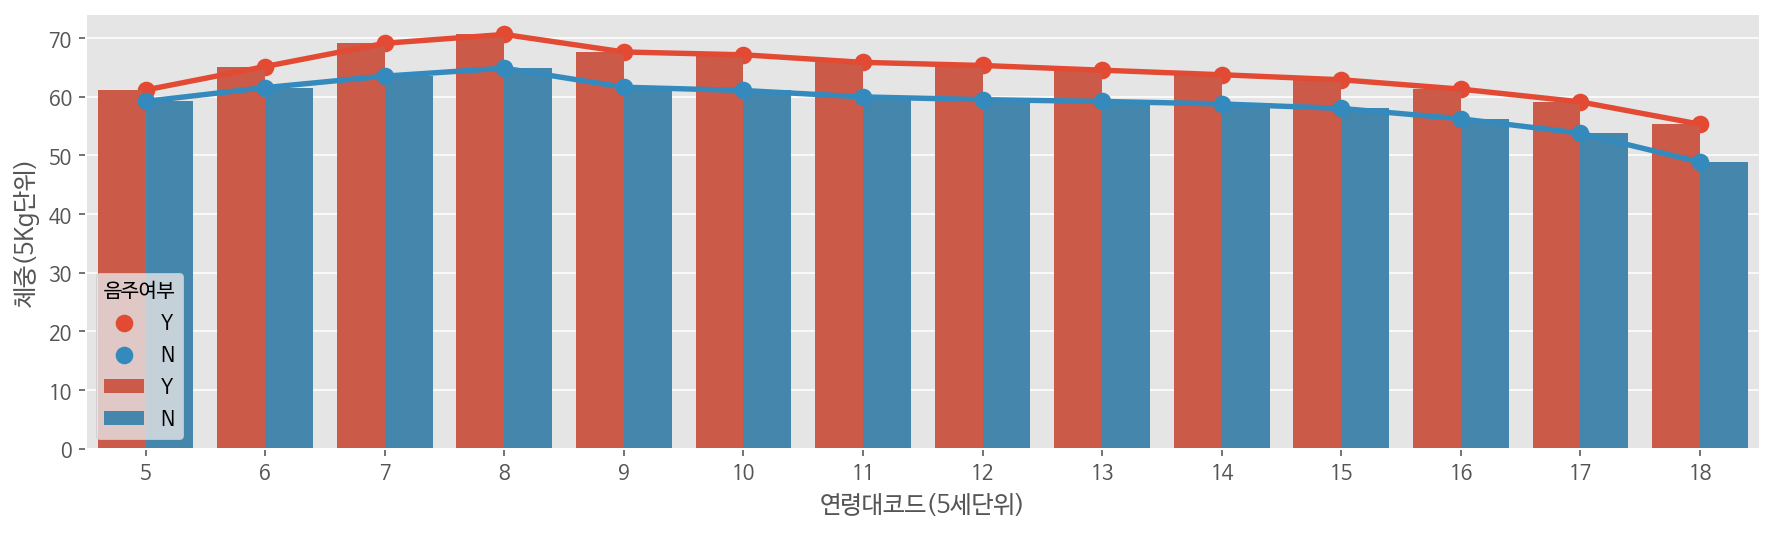

In [117]:
#연령대코드(5세단위)에 따른 체중(5kg단위)을 음주여부 따라 pointplot과 barplot으로 확인
fig, ax = plt.subplots(figsize=(15,4))
sns.pointplot(data=df, x='연령대코드(5세단위)',y='체중(5Kg단위)',hue='음주여부',ci=None, ax=ax)
sns.barplot(data=df, x='연령대코드(5세단위)',y='체중(5Kg단위)',hue='음주여부',ci=None, ax=ax)
plt.show()

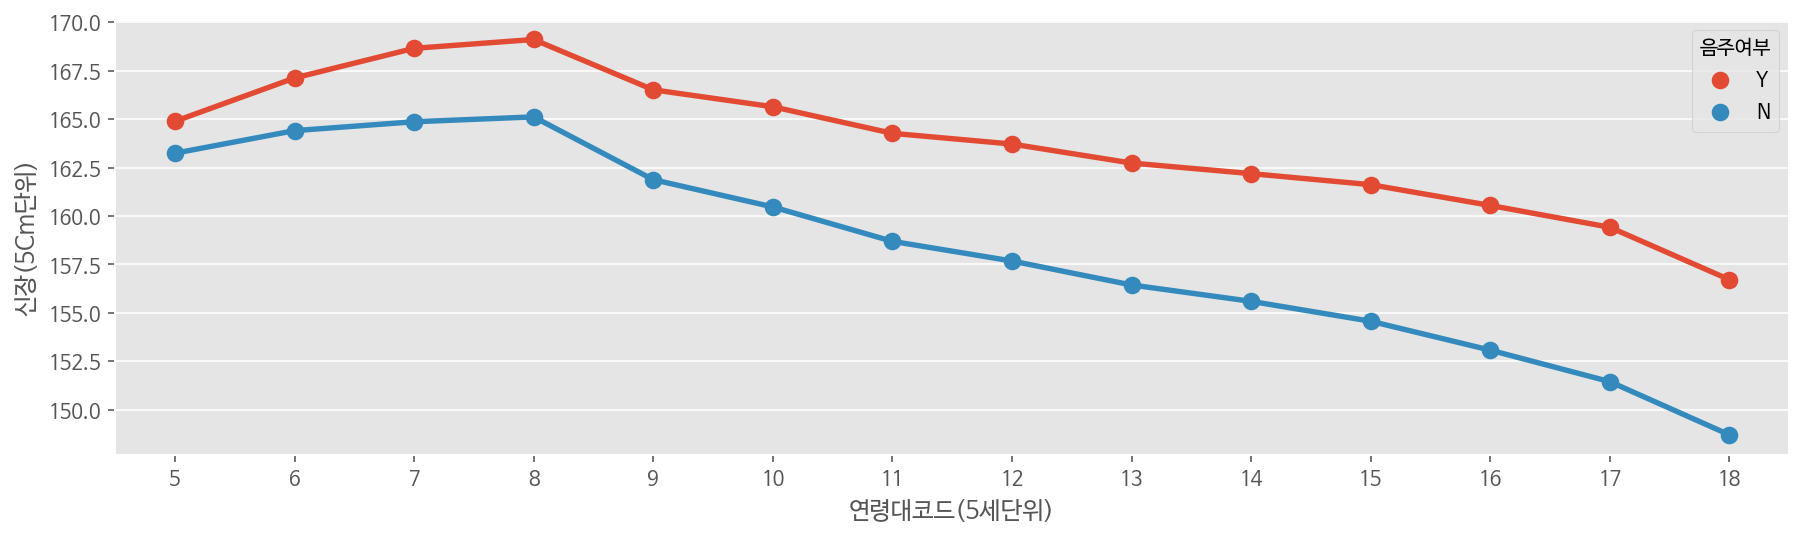

In [119]:
#연령대코드(5세단위)에 따른 신장(5Cm단위)을 음주여부 따라 pointplot으로 확인
fig, ax = plt.subplots(figsize=(15,4))
sns.pointplot(data=df, x='연령대코드(5세단위)',y='신장(5Cm단위)',hue='음주여부',ci=None, ax=ax)

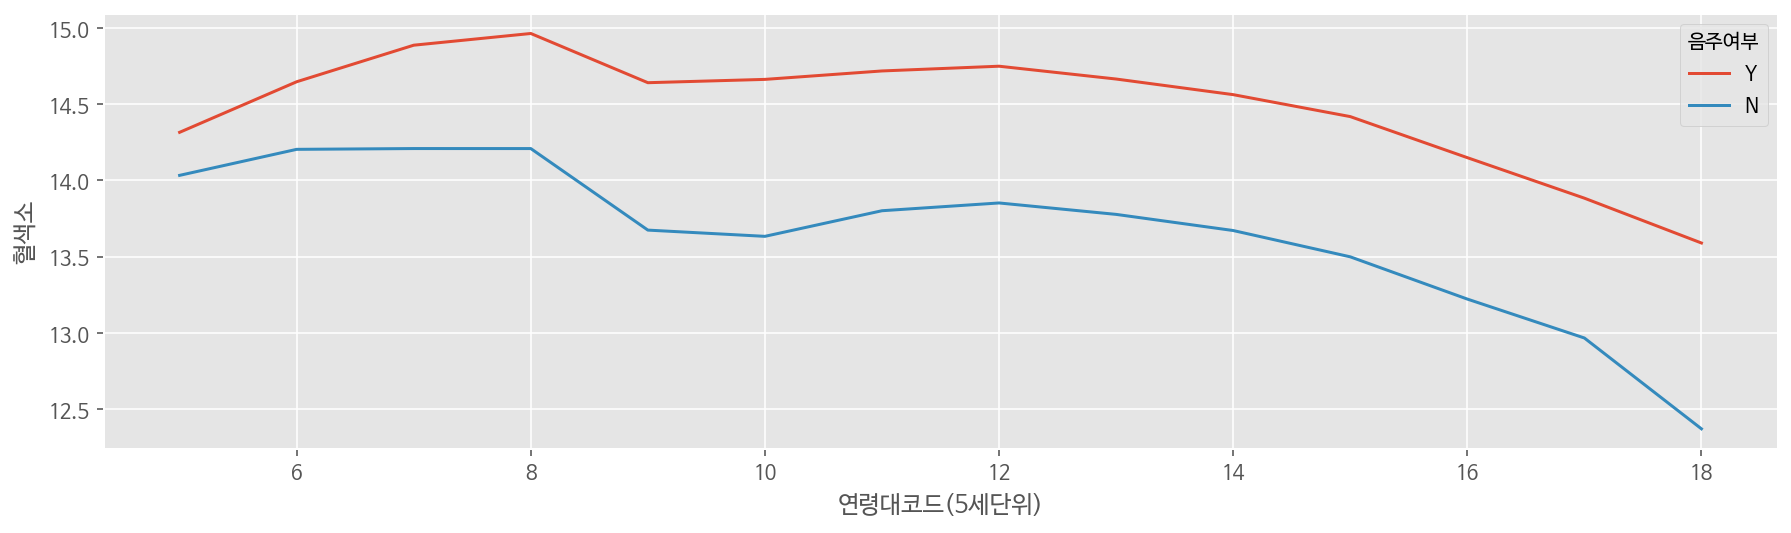

In [122]:
#연령대코드(5세단위)에 따른 혈색소를 음주여부 따라 lineplot으로 확인
fig, ax = plt.subplots(figsize=(15,4))
sns.lineplot(data=df, x='연령대코드(5세단위)',y='혈색소',hue='음주여부',ci=None, ax=ax)

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')